# MZA with 5 strain rates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("mime")
import pandas as pd
import h5py
from scipy.optimize import curve_fit

colors = ['#bb0000', '#00bb00', "#0000bb", '#bbbb00', '#bb00bb', "#00bbbb", '#bbbbbb', '#770000', '#007700', "#000077", '#777700', '#770077', "#007777", '#777777', '#440000', '#004400', "#000044", '#444400', '#440044', "#0044444", '#444444','#000000']

In [2]:
baseSize = (8, 6)  # Base size of a subplot

def sbPlot(n):
    if (n == 1): return 1, 1
    if (n <= 2): return 1, 2
    if (n <= 4): return 2, 2
    if (n <= 6): return 3, 2
    if (n <= 9): return 3, 3
    if (n <= 12): return 4, 3
    return 0, 0

def sbPlotSize(n):
    x, y = sbPlot(n)
    return baseSize[0] * y, baseSize[1] * x

In [3]:
h5f = h5py.File('../GleebleData.h5','r')
allData = h5f['all'][:]
shortData = h5f['short'][:]
h5f.close()

In [4]:
allData.shape, shortData.shape

((21030, 4), (1080, 4))

Remove first point of each curve, where $\varepsilon^p=0$

In [5]:
allData = allData[allData[:,0] != 0]
shortData = shortData[shortData[:,0]!=0]
identData = allData[allData[:,0] > 0.01]

Remove data to reconstruct

In [6]:
missed = 1
identData = identData[identData[:,1] != missed]
identData.shape

(17250, 4)

In [7]:
strains = np.unique(identData[:,0])
allStrains = np.unique(allData[:,0])
epsps = np.unique(identData[:,1])
temperatures = np.unique(identData[:,2])
nEps = len(strains)
nEpsp = len(epsps)
nTemp = len(temperatures)
strains, epsps, temperatures, nEps, nEpsp, nTemp

(array([0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019,
        0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028,
        0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037,
        0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045, 0.046,
        0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054, 0.055,
        0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063, 0.064,
        0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072, 0.073,
        0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081, 0.082,
        0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 , 0.091,
        0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1  ,
        0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108, 0.109,
        0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118,
        0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126, 0.127,
        0.128, 0.129, 0.13 , 0.131, 0.132, 0.133, 0.134, 0.135, 0.136,
      

# Identification of the MZA parameters
$\sigma^y = (C_1 + C_2\varepsilon^n) \exp\left[-(C_3 + C_4\varepsilon^p) + (C_5 + C_6(T-T_0))\ln\left(\frac{\dot{\varepsilon^p}}{\dot{\varepsilon^p_0}}\right)\right]$

In [8]:
T0 = temperatures[0]
epsp0 = epsps[0]
Tm = 1460

In [9]:
C1 = allData[(allData[:,1]==epsp0) & (allData[:,2]==T0)][0,3]
print("C1=%g" %(C1))

C1=13.5143


Get the curves for the reference strain rate

In [10]:
Sig = identData[identData[:,1] == epsp0]

In [11]:
I1 = []
S1 = []
J1 = []
for epsj in strains:
    sbdata = Sig[Sig[:,0] == epsj]
    params = np.polyfit((sbdata[:,2] - T0), np.log(sbdata[:,3]), 1)
    s1, i1 = params
    j1 = np.exp(i1)
    S1.append(s1)
    I1.append(i1)
    J1.append(j1)

In [12]:
(J1-C1)[2:]

array([ 7.9770147 ,  8.37336186,  8.57154653,  8.9072573 ,  9.22866078,
        9.2687547 ,  9.53613647,  9.80710586, 10.13017732, 10.30894922,
       10.6338139 , 10.82216849, 11.10049925, 11.37769556, 11.63946148,
       11.88206219, 12.13320655, 12.38169698, 12.6102295 , 12.80218552,
       12.88428787, 13.09411234, 13.21491977, 13.45249479, 13.56034061,
       13.77901263, 14.02710949, 14.18892587, 14.38535524, 14.5997169 ,
       14.732513  , 14.88865654, 14.9737447 , 15.15177017, 15.23789877,
       15.50082537, 15.59923102, 15.85076113, 16.05232434, 16.14848107,
       16.26371169, 16.39892656, 16.54259912, 16.64835934, 16.72304572,
       16.85305663, 17.0099229 , 17.12189807, 17.28228972, 17.43252045,
       17.57287226, 17.7136167 , 17.82175427, 17.98551967, 18.11768097,
       18.2671403 , 18.3766165 , 18.45176955, 18.53101494, 18.61389403,
       18.70968397, 18.84660899, 18.98621728, 19.10953412, 19.23884836,
       19.36783974, 19.50660412, 19.60575019, 19.70425538, 19.80

In [13]:
params = np.polyfit(np.log(strains), np.log(J1-C1), 1)
s, i = params
n = s
C2 = np.exp(i)
print("n=%g, C2=%g" %(n, C2))

n=0.0645262, C2=21.3424


In [14]:
params = np.polyfit(strains, S1, 1)
s, i = params
C3 = -i
C4 = -s
print("C3=%g, C4=%g" %(C3, C4))

C3=0.0048197, C4=7.49132e-05


In [15]:
def LinearFunction(x, a, b):
    return a*x + b

c5 = []
c6 = []
cl=0
for epsj in strains[:10]:
    sbdata = identData[identData[:,0]==epsj]
    S2 = []
    for temp in temperatures:
        sbdata1 = sbdata[sbdata[:,2]==temp]
        params1 = np.polyfit(np.log(sbdata1[:,1]/epsp0), (np.log(sbdata1[:,3])), 1)
        s1, i1 = params1
        S2.append(s1)
    params2 = np.polyfit(temperatures-T0, S2, 1) 
    s2,i2 = params2
    s2,i2
    c5.append(i2)
    c6.append(s2)
    cl +=1
C5 = np.mean(c5)
C6 = np.mean(c6)
C5,C6
print("C5=%g, C6=%g" %(C5, C6))

C5=0.13848, C6=9.57903e-05


In [16]:
C1,C2,C3,C4,C5,C6,n

(13.51428,
 21.342367240251154,
 0.004819704115266307,
 7.491319158087404e-05,
 0.13848004673374542,
 9.579034912762353e-05,
 0.0645261859250238)

In [17]:
def MZAconstitutiveLaw(eps, epsp, T):
    return (C1 + C2 * eps**n) * np.exp(-(C3 + C4 *eps) *(T-T0) + (C5 + C6*(T-T0))*np.log(epsp / epsp0))

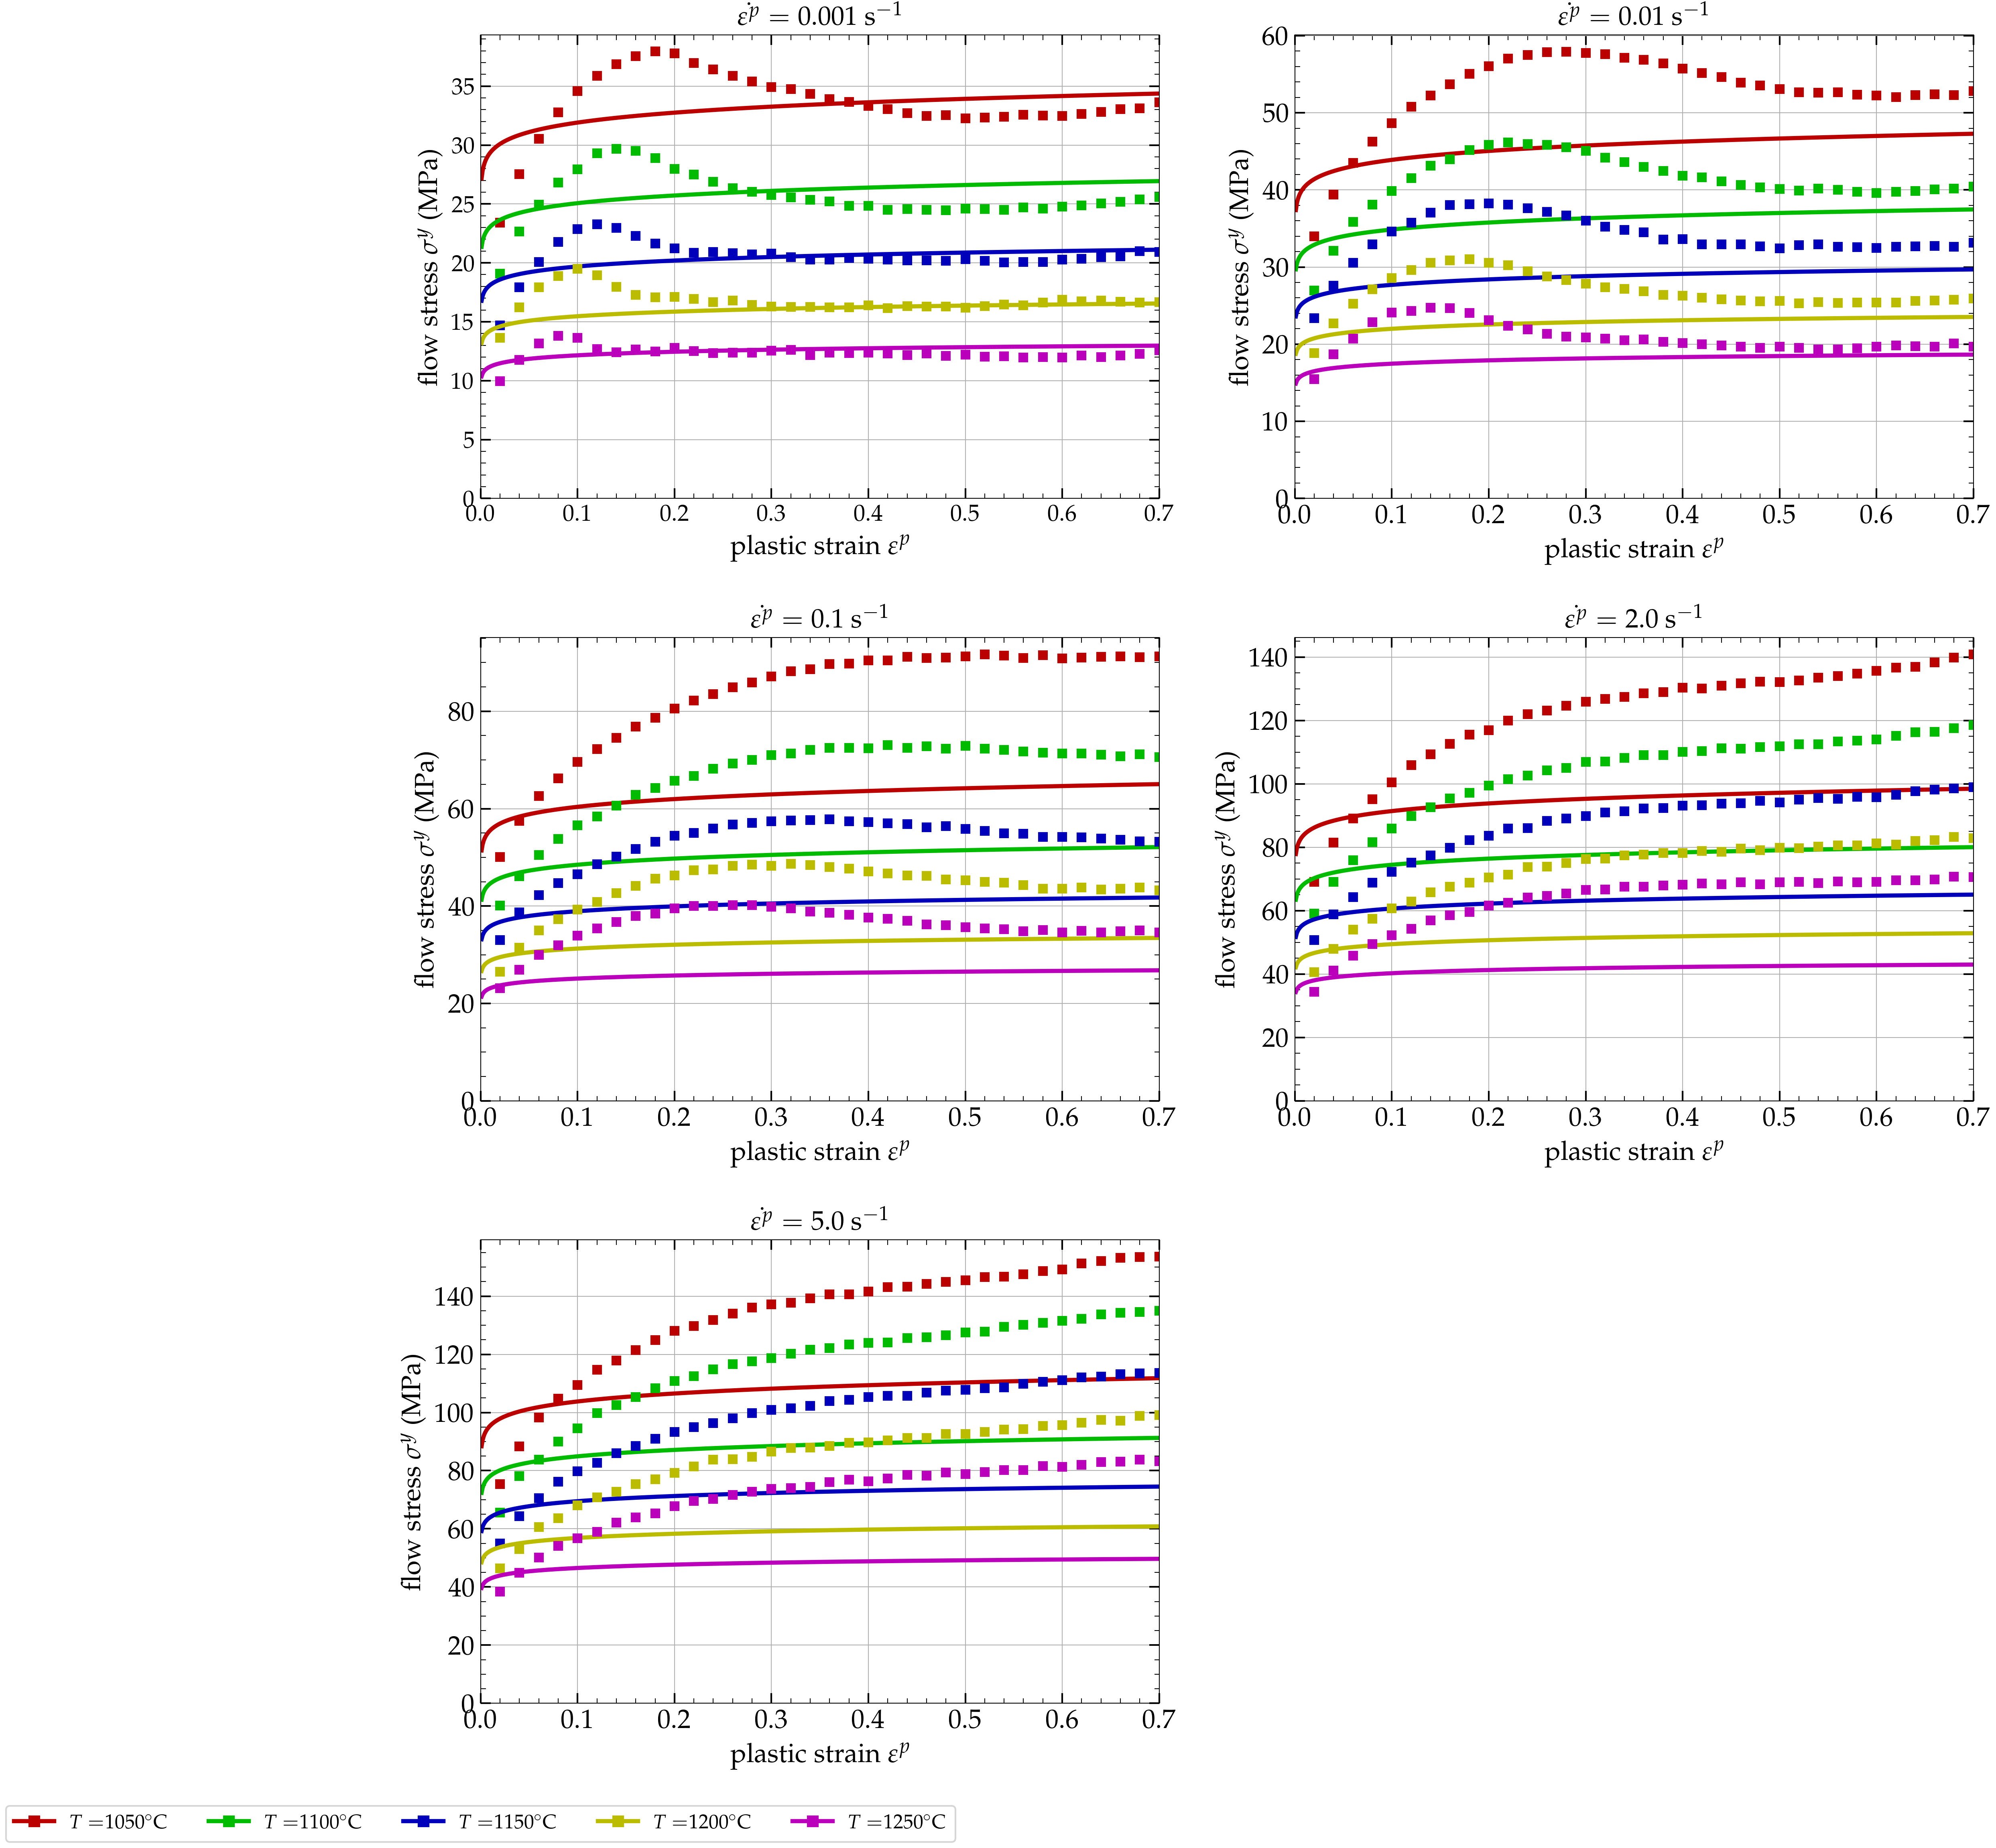

In [18]:
# Plot the curves
from matplotlib.lines import Line2D
def create_dummy_line(**kwds):
    return Line2D([], [], **kwds)

plt.figure(figsize = sbPlotSize(nEpsp))
plt.rc('text', usetex = True)
idx = 1
plt.subplots_adjust(hspace = 0.3)
for epsp in list(epsps):
    legendLine = []
    xs, ys = sbPlot(nEpsp)
    plt.subplot(xs, ys, idx)
    sbdata = shortData[shortData[:,1]==epsp]
    cl =0
    for temp in list(temperatures):
        sbdata1 = sbdata[sbdata[:,2]==temp]
        plt.plot(sbdata1[:,0], sbdata1[:,3], colors[cl], marker = 's', markersize = 5, linestyle = 'none')
        plt.plot(allStrains, MZAconstitutiveLaw(allStrains, epsp, temp), colors[cl], linewidth = 2.5)
        plt.rcParams['xtick.labelsize'] = 16
        plt.rcParams['ytick.labelsize'] = 16
        legendLine.append((r'$T=$' + str(int(temp)) + r'$^{\circ}$C', {'color':colors[cl], 'linestyle':'-', 'linewidth':2.5, 'marker':'s'}))
        cl +=1
    plt.xlim(0, 0.7)
    plt.ylim(bottom=0)
    plt.xlabel(r'plastic strain $\varepsilon^p$', fontsize = 16) # Labels the x axis
    plt.ylabel(r'flow stress $\sigma^y$ (MPa)', fontsize = 16) # Labels the y axis
    plt.title(r'$\dot{\varepsilon^p} = ' + str(epsp) + '$ s$^{-1}$', fontsize = 16) # Self explicit command
    idx += 1
plt.legend([create_dummy_line(**l[1]) for l in legendLine],[l[0] for l in legendLine], 
           loc = 'upper center', fontsize = 12, ncols = 5, bbox_to_anchor = (0.0, -0.2), shadow = False)
plt.savefig("CompExpMZA-5i.svg")
plt.show()

In [19]:
MZAstress = MZAconstitutiveLaw(allData[:,0], allData[:,1], allData[:,2])

In [20]:
data = np.concatenate((allData[:,0:3],MZAstress.reshape((MZAstress.shape[0],1))),axis=1)
h5f = h5py.File('MZA-5i.h5','w')
h5f.create_dataset('data', data = data)
h5f.close()

In [21]:
EAAR = np.sum(np.abs((allData[:,3] - MZAstress)/(allData[:,3])))*100/MZAstress.shape[0]
print("EAAR = %.2f" %(EAAR) + ' %')

EAAR = 21.49 %


In [22]:
RMSE = np.sqrt(np.sum((allData[:,3] - MZAstress)**2)/MZAstress.shape[0])
print('RMSE = %.2f' %(RMSE)+' MPa')

RMSE = 19.86 MPa


In [23]:
C1,C2,C3,C4,C5,C6,n

(13.51428,
 21.342367240251154,
 0.004819704115266307,
 7.491319158087404e-05,
 0.13848004673374542,
 9.579034912762353e-05,
 0.0645261859250238)

In [24]:
def outOf(val, i):
    if ((val<-i) or (val>i)): return True
    return False

def conv (v, d):
    va = abs(v)
    e = int(np.log10(va))
    if (va < 1): e-=1
    if outOf(e,2):
        a = v * 10**(-e)
        v = np.round(a * 10**d)/10**d
        return str(v)+'\\times 10^{'+str(e)+'}'
    v = np.round(v * 10**d)/10**d
    return str(v)

print("C1 =",conv(C1,4))
print("C2 =",conv(C2,4))
print("C3 =",conv(C3,4))
print("C4 =",conv(C4,4))
print("C5 =",conv(C5,4))
print("C6 =",conv(C6,4))
print("n =",conv(n,4))

print(conv(C1,4),'&',conv(C2,4),'&',conv(C3,4),'&',conv(C4,4),'&',conv(C5,4),'&',conv(C6,4),'&',conv(n,4))

C1 = 13.5143
C2 = 21.3424
C3 = 4.8197\times 10^{-3}
C4 = 7.4913\times 10^{-5}
C5 = 0.1385
C6 = 9.579\times 10^{-5}
n = 0.0645
13.5143 & 21.3424 & 4.8197\times 10^{-3} & 7.4913\times 10^{-5} & 0.1385 & 9.579\times 10^{-5} & 0.0645
